# 1- Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re
import plotly.express as px

In [2]:
df=pd.read_csv('banana_quality.csv')

In [3]:
df

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good
...,...,...,...,...,...,...,...,...
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad


In [4]:
df.shape

(8000, 8)

In [5]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


# A - Types Of Columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


# B - Duplicates

In [7]:
df[df.duplicated() == True]

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality


In [8]:
# no duplicated columns

# C - Nulls

In [9]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [10]:
# no nulls

# D- Outlires

In [11]:
df.select_dtypes(exclude='object').columns # all numeric columns no object columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity'],
      dtype='object')

<AxesSubplot:>

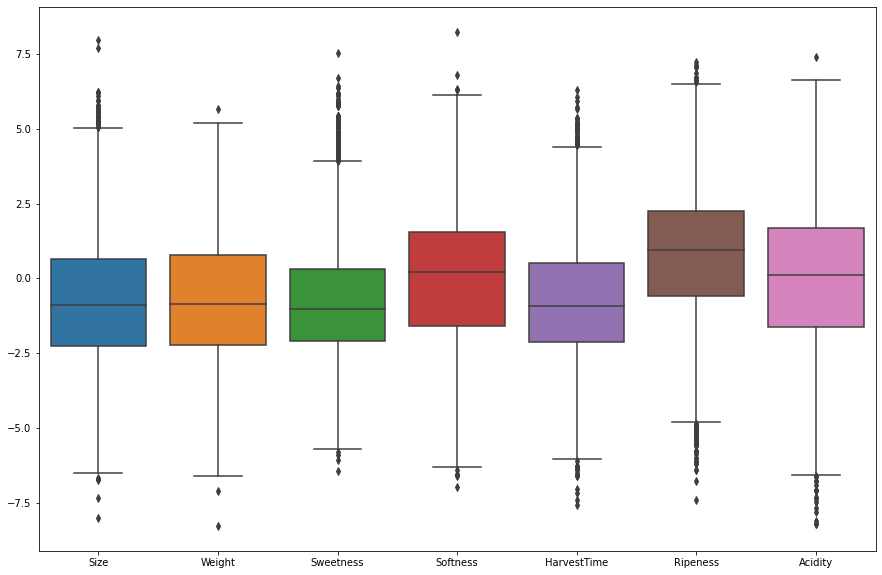

In [12]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [13]:
# all columns have outliers

In [14]:
 outliers= []
    
    
  
count_2=0 
count_3=0
count_4=0
     
for j in df.select_dtypes(exclude='object').columns:
    q1 = np.percentile(df[j], 25)
    q3 = np.percentile(df[j], 75)    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for m in df[j]:
        
          if ((m<lwr_bound)|(m>upr_bound)):
                outliers.append(m)
    if outliers== [] :
                       count_2+=1 
                       print( f"{count_2}- {j} column has {len(outliers)} outliers")
                       count_3+=1
                       
        
        
    else:
        
         count_2+=1                       
           
         print(f"{count_2}- {j} column has {len(outliers)} outliers")
         outliers.clear()  
         count_4+=1
                             
            
         
 
    
        
                    
    

1- Size column has 36 outliers
2- Weight column has 3 outliers
3- Sweetness column has 178 outliers
4- Softness column has 9 outliers
5- HarvestTime column has 58 outliers
6- Ripeness column has 58 outliers
7- Acidity column has 17 outliers


In [15]:
count_3   # columns havent outliers

0

In [16]:
count_4    # columns have outliers

7

# E - Corrolation

In [17]:
 df.corr()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000


In [18]:
#there are too much corrolation of columns

# 2- Data Processing


## A- Processing outliers

In [19]:
for s in df.select_dtypes(exclude='object').columns:
    q1 = np.percentile(df[s], 25)
    q3 = np.percentile(df[s], 75)    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    df[s]=np.where(df[s]> upr_bound, upr_bound ,np.where(df[s] < lwr_bound,lwr_bound,df[s]))

        
          

<AxesSubplot:>

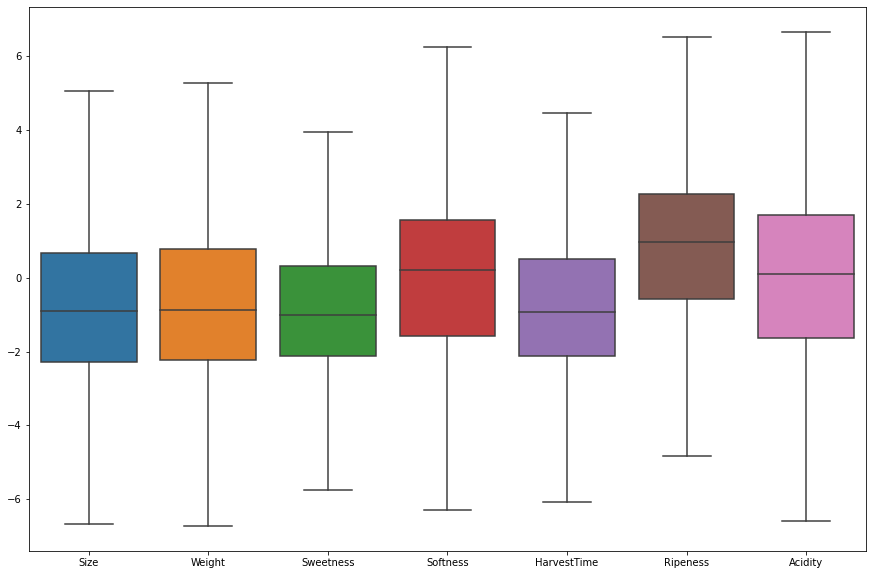

In [20]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)

In [21]:
outliers= []
    
    
  
count_2=0 
count_3=0
count_4=0
     
for j in df.select_dtypes(exclude='object').columns:
    q1 = np.percentile(df[j], 25)
    q3 = np.percentile(df[j], 75)    
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for m in df[j]:
        
          if ((m<lwr_bound)|(m>upr_bound)):
                outliers.append(m)
    if outliers== [] :
                       count_2+=1 
                       print( f"{count_2}- {j} column has {len(outliers)} outliers")
                       count_3+=1
                       
                       
        
        
    else:
        
         count_2+=1                       
           
         print(f"{count_2}- {j} column has {len(outliers)} outliers")
         outliers.clear()  
         count_4+=1
                             
            
         
 
    

1- Size column has 0 outliers
2- Weight column has 0 outliers
3- Sweetness column has 0 outliers
4- Softness column has 0 outliers
5- HarvestTime column has 0 outliers
6- Ripeness column has 0 outliers
7- Acidity column has 0 outliers


# Feature Engineering

## A - Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Quality"] = le.fit_transform(df["Quality"])

## B - Imbalanced Data

In [23]:
df['Quality'].value_counts(normalize=True)

1    0.50075
0    0.49925
Name: Quality, dtype: float64

In [24]:
# the quality feature is balanced

In [25]:
df['Quality']

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: Quality, Length: 8000, dtype: int32

# Build Model

In [43]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import metrics , datasets , linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier




### split data

In [44]:
x=df.drop(columns=['Quality'])

In [45]:
y=df['Quality']

In [46]:
 x_train,x_test, y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=0)

### data scaling

In [54]:
scaler= StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)


##  KNN Model

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn=KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
y2_predict= knn.predict(X_test)

## i- Checking if there over fitting

In [59]:
knn.score(X_train,y_train)

1.0

In [60]:
knn.score(X_test,y_test)

0.9683333333333334

## ii- Metrics

### a - Accuracy Score

In [61]:
accuracy_score(y_test,y2_predict)

0.9683333333333334

### b - Confusion Matrix

In [62]:
confusion_matrix(y_test,y2_predict)

array([[1171,   40],
       [  36, 1153]], dtype=int64)

### c - Recall

In [63]:
recall_score(y_test,y2_predict)

0.9697224558452481

### d - Precision Score

In [64]:
precision_score(y_test,y2_predict)

0.9664710813076278

### e - roc_auc_score

In [65]:
roc_auc_score(y_test,y2_predict)

0.9683459512917405

### f - Classification Report

In [66]:
classification_report(y_test,y2_predict)

'              precision    recall  f1-score   support\n\n           0       0.97      0.97      0.97      1211\n           1       0.97      0.97      0.97      1189\n\n    accuracy                           0.97      2400\n   macro avg       0.97      0.97      0.97      2400\nweighted avg       0.97      0.97      0.97      2400\n'